# Clustering data processing: Ganglion Cells in the Retina
- **Author:** David Felipe
- **Contact:** https://github.com/davidnfu0
- **Last Modification:** January 25, 2024
- **Description:** This notebook is used to process the data from the retina ganglion cells. 
- **Note:** In this document, you can modify the parameters of the PCA to adjust the models to new requirements.

## Introduction

### Importing libraries

In [1]:
import sys
import numpy as np
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

C:\Users\David\AppData\Local\Temp\ipykernel_12816\554980151.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sys.path.append("../../")

In [3]:
from scripts import load_yaml_config, pca_information_loss

### Paths, constants and configuration

In [4]:
plt.style.use("seaborn-v0_8-darkgrid")

In [5]:
configPath = "../../config/"
config = load_yaml_config(configPath + "general_config.yml")

### Loading data

In [6]:
with open("../.." + config["paths"]["data_cache"]["RFS"], "rb") as file:
    RFS = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["T_DATA_STA"], "rb") as file:
    T_DATA_STA = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["TOTAL_SPIKES"], "rb") as file:
    TOTAL_SPIKES = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["BINS_STIM_DICT"], "rb") as file:
    BINS_STIM_DICT = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["FUNC_BANDWIDTH"], "rb") as file:
    FUNC_BANDWIDHT = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["FUNC_HWHH"], "rb") as file:
    FUNC_HWHH = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["FUNC_PEAKS"], "rb") as file:
    FUNC_PEAKS = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["FUNC_ROOTS"], "rb") as file:
    FUNC_ROOTS = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["POLY_BANDWIDTH"], "rb") as file:
    POLY_BANDWIDHT = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["POLY_HWHH"], "rb") as file:
    POLY_HWHH = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["POLY_PEAKS"], "rb") as file:
    POLY_PEAKS = pickle.load(file)
with open("../.." + config["paths"]["data_cache"]["POLY_ROOTS"], "rb") as file:
    POLY_ROOTS = pickle.load(file)
TEMPS_STIM = np.array(list(BINS_STIM_DICT.keys()))
TEMPS_RFS = np.array([temp for temp in RFS.keys() if temp in BINS_STIM_DICT.keys() and temp in TOTAL_SPIKES.keys()])

## Data dict

In [7]:
staDataDict = {}

In [8]:
for temp in TEMPS_RFS:
    staDataDict[temp] = {
        "x": None,
        "y": None,
        "w": None,
        "h": None,
        "a": None,
        "exc": None,
        "area": None,
        "total_spikes": None,
        "peak_poly": None,
        "time_to_peak_poly": None,
        "array_peak_position_poly": None,
        "hwhh_x_poly": None,
        "hwhh_y_poly": None,
        "bandwidth_poly": None,
        "zero_crossing_poly": None,
        "peak_func": None,
        "time_to_peak_func": None,
        "array_peak_position_func": None,
        "hwhh_x_func": None,
        "hwhh_y_func": None,
        "bandwidth_func": None,
        "zero_crossing_func": None,
    }
    tempDict = staDataDict[temp]

    for var in RFS[temp].keys():
        tempDict[var] = RFS[temp][var]

    tempDict["area"] = RFS[temp]["w"] * RFS[temp]["h"]
    tempDict["total_spikes"] = TOTAL_SPIKES[temp]

    if POLY_PEAKS[temp]["max"] is not None:
        tempDict["peak_poly"] = POLY_PEAKS[temp]["max"][1]
        tempDict["time_to_peak_poly"] = POLY_PEAKS[temp]["max"][0]
        tempDict["array_peak_position_poly"] = POLY_PEAKS[temp]["max"][2]
    elif POLY_PEAKS[temp]["min"] is not None:
        tempDict["peak_poly"] = POLY_PEAKS[temp]["min"][1]
        tempDict["time_to_peak_poly"] = POLY_PEAKS[temp]["min"][0]
        tempDict["array_peak_position_poly"] = POLY_PEAKS[temp]["min"][2]
    else:
        print("MISS POLY PEAK:", temp)
    if POLY_HWHH[temp] is not None:
        tempDict["hwhh_x_poly"] = POLY_HWHH[temp][0]
        tempDict["hwhh_y_poly"] = POLY_HWHH[temp][1]
    else:
        print("MISS POLY HWHH:", temp)
    tempDict["bandwidth_poly"] = POLY_BANDWIDHT[temp]
    tempDict["zero_crossing_poly"] = POLY_ROOTS[temp]["ZC"]

    if FUNC_PEAKS[temp]["max"] is not None:
        tempDict["peak_func"] = FUNC_PEAKS[temp]["max"][1]
        tempDict["time_to_peak_func"] = FUNC_PEAKS[temp]["max"][0]
        tempDict["array_peak_position_func"] = FUNC_PEAKS[temp]["max"][2]
    elif FUNC_PEAKS[temp]["min"] is not None:
        tempDict["peak_func"] = FUNC_PEAKS[temp]["min"][1]
        tempDict["time_to_peak_func"] = FUNC_PEAKS[temp]["min"][0]
        tempDict["array_peak_position_func"] = FUNC_PEAKS[temp]["min"][2]
    else:
        print("MISS FUNC PEAK:", temp)
    if FUNC_HWHH[temp] is not None:
        tempDict["hwhh_x_func"] = FUNC_HWHH[temp][0]
        tempDict["hwhh_y_func"] = FUNC_HWHH[temp][1]
    else:
        print("MISS FUNC HWHH:", temp)
    tempDict["bandwidth_func"] = FUNC_BANDWIDHT[temp]
    tempDict["zero_crossing_func"] = FUNC_ROOTS[temp]["ZC"]

KeyError: 'temp_100'

In [ ]:
staDf = pd.DataFrame.from_dict(staDataDict, orient="index")
staDf.reset_index(inplace=True)
staDf.rename(columns={"index": "template"}, inplace=True)
staDf.dropna(inplace=True)
scaler = StandardScaler()
staScaler = scaler.fit_transform(staDf.iloc[:, 1:])
staNorm = pd.DataFrame(normalize(staScaler), index=staDf["template"])
staNorm.columns = staDf.columns[1:]
TEMPS_STA = staDf["template"].values

### Stim dict

In [ ]:
PROTOCOLS = []
for protocolDescription in list(BINS_STIM_DICT[TEMPS_STIM[0]].keys()):
    protocol = protocolDescription.split(".")[0]
    if protocol not in PROTOCOLS:
        PROTOCOLS.append(protocol)

In [ ]:
stimDict = {protocol: {} for protocol in PROTOCOLS}
for protocol, table in stimDict.items():
    for temp in TEMPS_STIM:
        if temp not in table:
            table[temp] = {}
        for protocolDescription, repetitions in BINS_STIM_DICT[temp].items():
            if protocolDescription.split(".")[0] == protocol:
                num_repetition = len(repetitions)
                for repetition, spikes in repetitions.items():
                    for bin, spike in enumerate(spikes):
                        key = f"avg-{protocolDescription}-bin_{bin}"
                        if key not in table[temp]:
                            table[temp][key] = 0
                        table[temp][key] += spike
                for bin in range(len(spikes)):
                    key = f"avg-{protocolDescription}-bin_{bin}"
                    table[temp][key] /= num_repetition

In [ ]:
stimDfsDict = {}
for protocol, table in stimDict.items():
    stimDfsDict[protocol] = pd.DataFrame.from_dict(table, orient="index")

In [ ]:
for df in stimDfsDict.values():
    df.fillna(0, inplace=True)

In [ ]:
if "template" not in list(stimDfsDict[PROTOCOLS[0]].columns):
    for df in stimDfsDict.values():
        df.reset_index(inplace=True)
        df.rename(columns={"index": "template"}, inplace=True)
    print("Added template column")
else:
    print("Already has template column")

Added template column


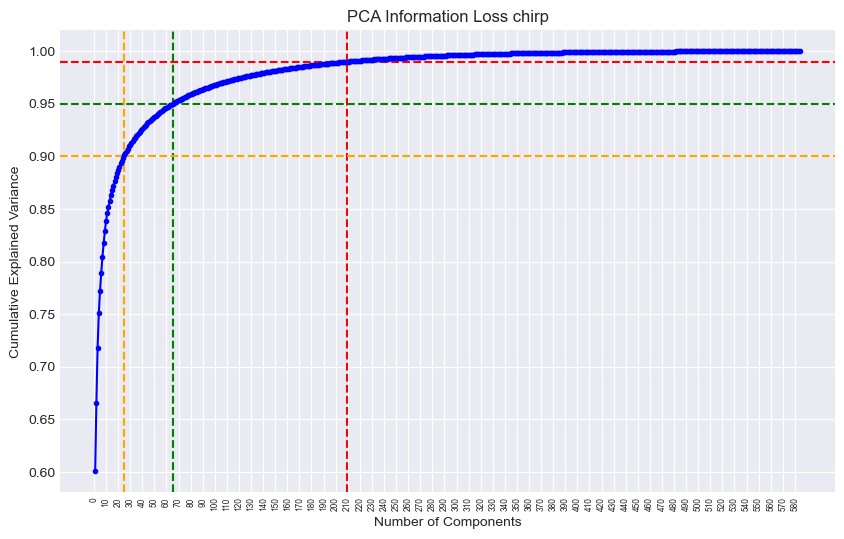

In [ ]:
for df_name, df in stimDfsDict.items():
    if df_name == "chirp":
        if len(df.columns) > 3:
            pca_information_loss(
                df_name,
                df.drop((["template"]), axis=1).dropna(),
                max_components=min(len(df.dropna()) - 1, len(df.columns) - 1),
            )

In [ ]:
scaler = StandardScaler()
stimNormDict = {}

for df_name, df in stimDfsDict.items():
    if df_name == "chirp":
        scaled_df = scaler.fit_transform(df.iloc[:, 1:])
        df_norm = normalize(scaled_df)
        stimNormDict[df_name] = pd.DataFrame(df_norm, index=df["template"])

In [ ]:
stimDimensionDict = {
    "chirp": 60,
}
print("Stimulus dimensionality:", sum(stimDimensionDict.values()))

Stimulus dimensionality: 60


In [ ]:
stimPCADict = {}
for df_name, df in stimNormDict.items():
    if df_name in stimDimensionDict.keys():
        pca = PCA(n_components=stimDimensionDict[df_name])
        pca.fit(df)
        stimPCADict[df_name] = pd.DataFrame(pca.transform(df), index=df.index)
    else:
        print(f"Missing dimension for {df_name}")

In [ ]:
for df_name, df in stimPCADict.items():
    df_columns = []
    for i in range(df.shape[1]):
        df_columns.append(f"{df_name}-comp_{i+1}")
    df.columns = df_columns

In [ ]:
stimDf = pd.concat(stimPCADict.values(), axis=1)

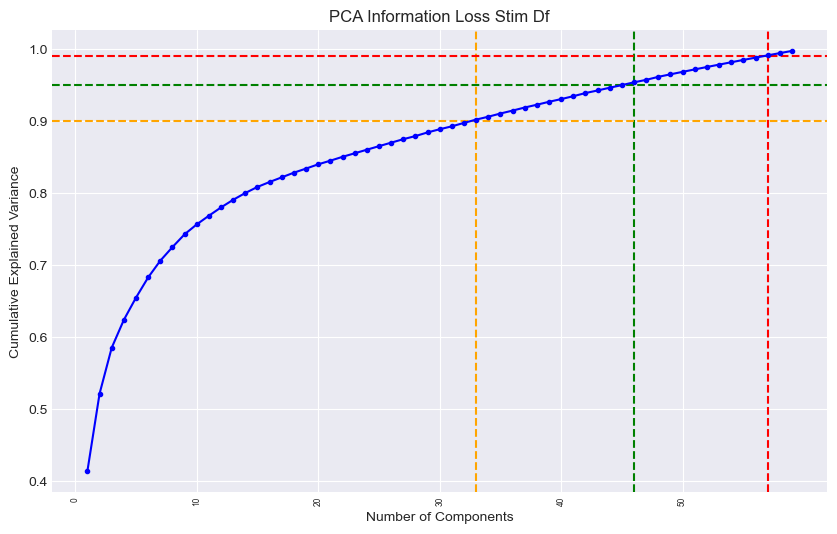

In [ ]:
pca_information_loss(
    "Stim Df", stimDf, max_components=min(stimDf.shape[0] - 1, stimDf.shape[1] - 1)
)

In [ ]:
pca = PCA(n_components=60)
pca.fit(stimDf)
stimPca = pd.DataFrame(pca.transform(stimDf), index=stimDf.index)
stimPcaColumns = stimPca.columns
newStimPcaColumns = []
for col in stimPcaColumns:
    newStimPcaColumns.append("stim_pca_comp_" + str(col))
stimPca.columns = newStimPcaColumns

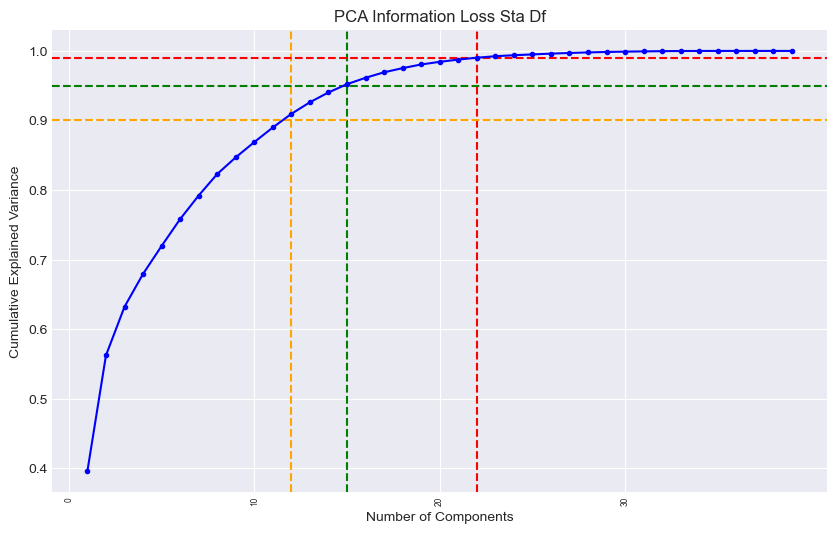

In [ ]:
pca_information_loss(
    "Sta Df", staNorm, max_components=min(staNorm.shape[0] - 1, staNorm.shape[1] - 1)
)

In [ ]:
pca = PCA(n_components=15)
pca.fit(staNorm)
staPca = pd.DataFrame(pca.transform(staNorm), index=staNorm.index)
staPcaColumns = staPca.columns
newStaPcaColumns = []
for col in staPcaColumns:
    newStaPcaColumns.append("sta_pca_comp_" + str(col))
staPca.columns = newStaPcaColumns

## Export the data

In [ ]:
stimPaths = ["chirp_df", "checkerboard_df", "natural_images_df", "ensembles_df"]
for stimPath in stimPaths:
    stimDfsDict[stimPath.replace("_df", "")].to_csv(
        "../" + config["paths"]["data"][stimPath], index=True
    )
stimDf.to_csv("../" + config["paths"]["data"]["stim_df"], index=True)
stimPca.to_csv("../" + config["paths"]["data"]["stim_pca_df"], index=True)
staDf.to_csv("../" + config["paths"]["data"]["sta_og_df"], index=True)
staNorm.to_csv("../" + config["paths"]["data"]["sta_df"], index=True)
staPca.to_csv("../" + config["paths"]["data"]["sta_pca_df"], index=True)

___